In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
titanic = pd.read_csv('./AI_DATA/titanic.csv')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)

In [29]:
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = titanic['Survived']

In [30]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=5)
model = clf.fit(X,y)

In [32]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_5 <= 28.86
|   |   |   |--- feature_5 <= 28.23
|   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  28.23
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  28.86
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  2.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_5 <= 20.80
|   |   |   |--- feature_2 <= 16.50
|   |   |   |   |--- feature_2 <= 14.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  14.75
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  16.50
|   |   |   |   |--- feature_2 <= 36.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  36.

### Plotting Data using plot_tree

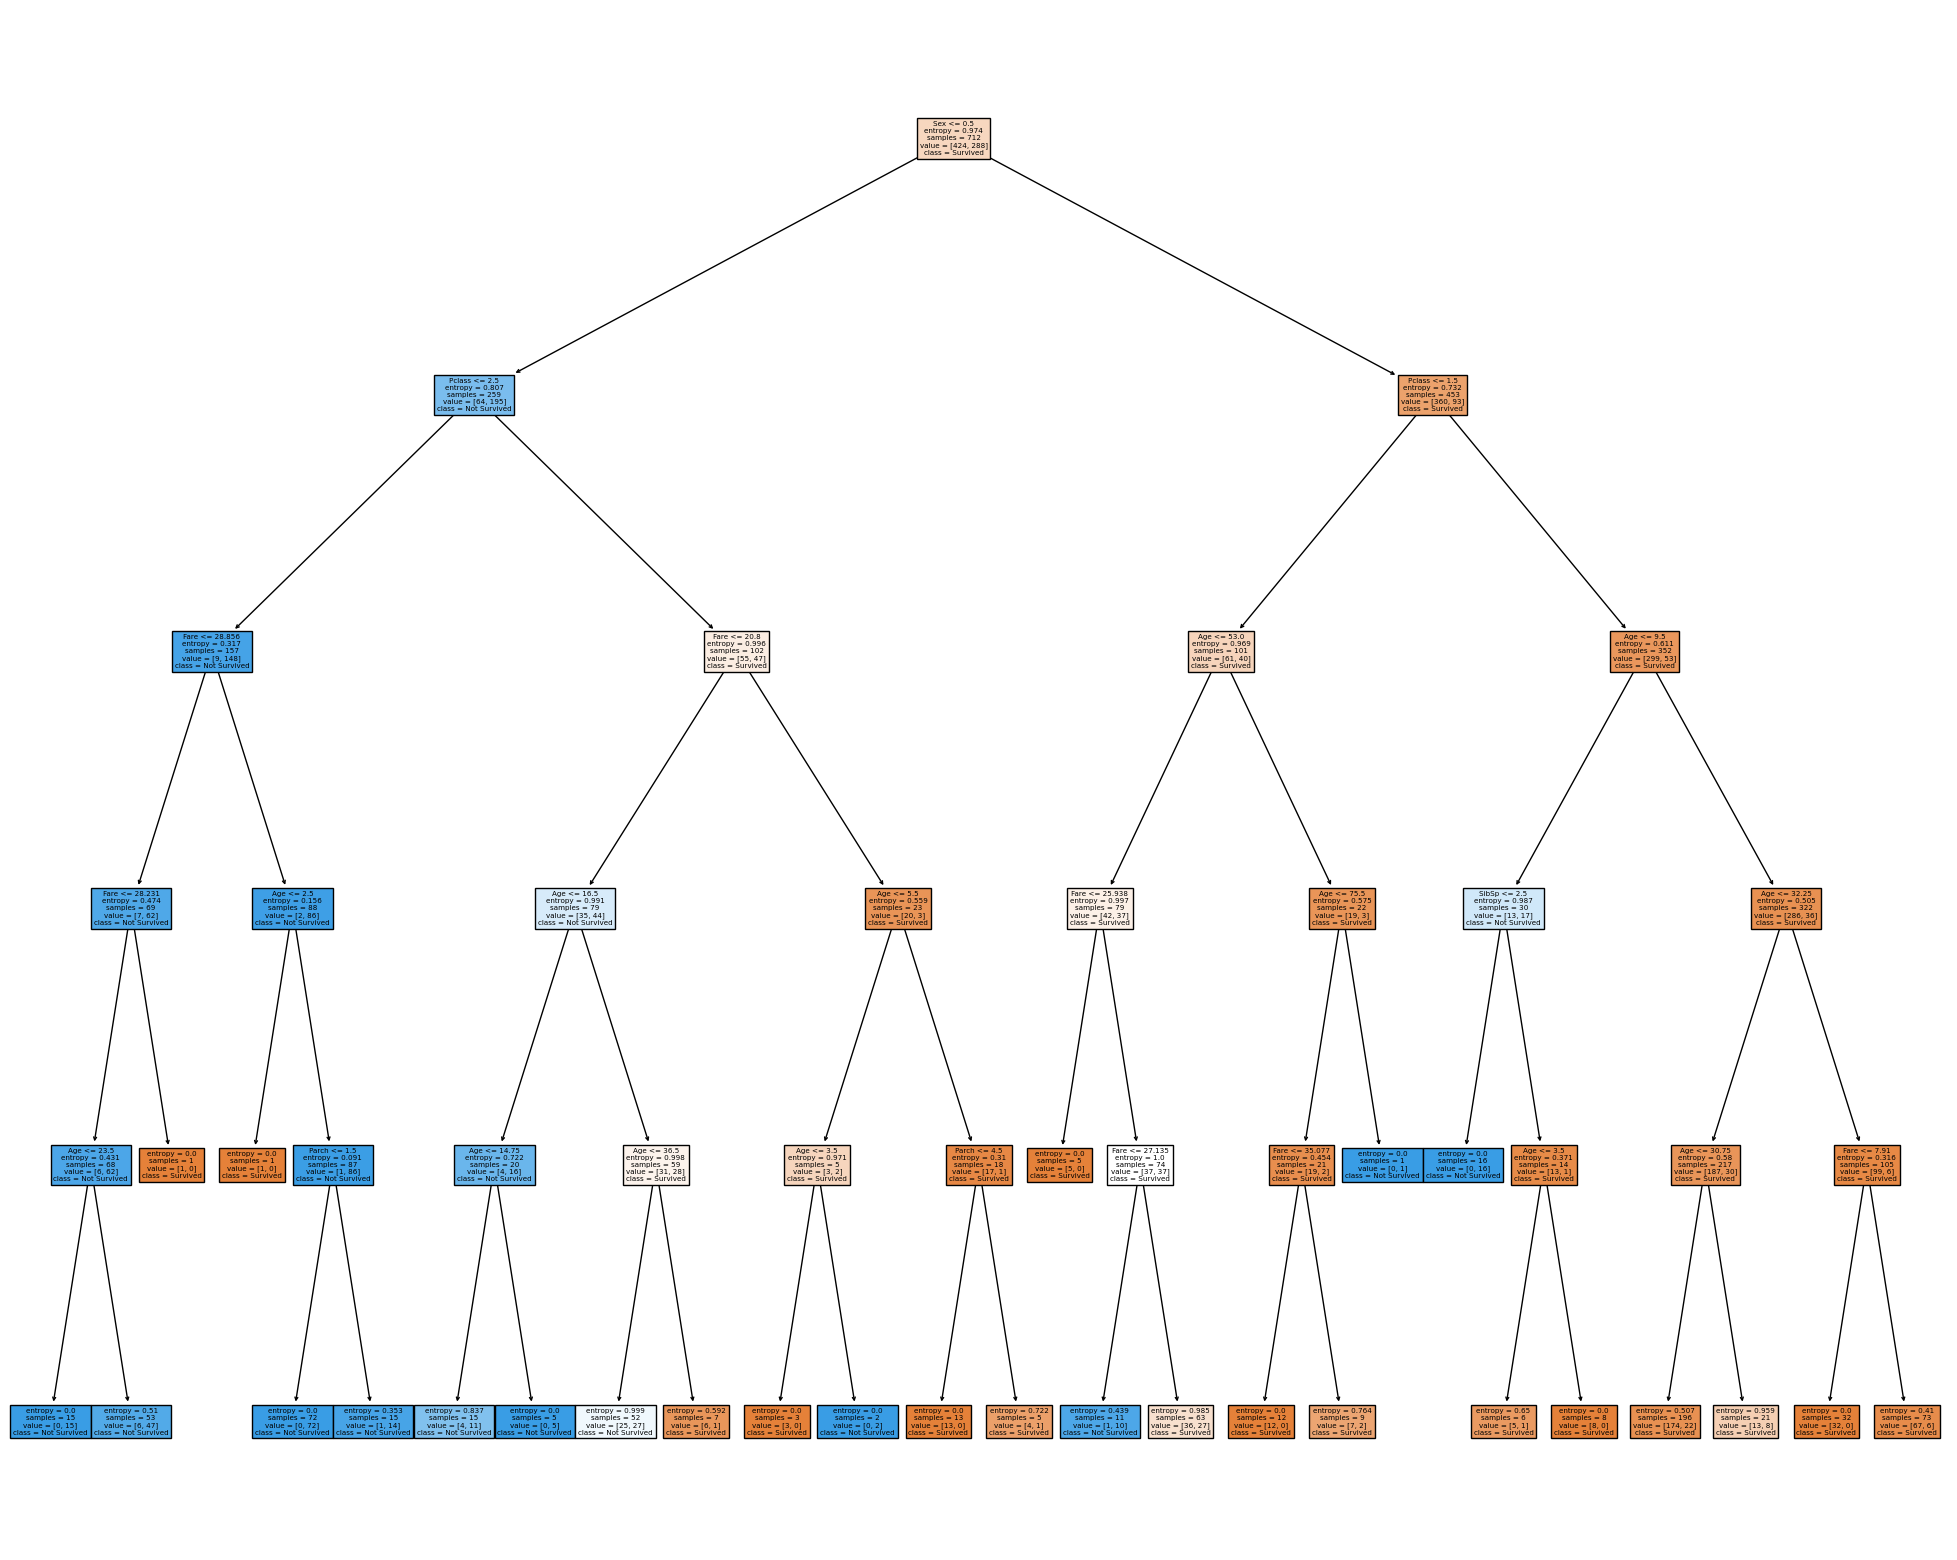

In [35]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,
                 feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],
                 class_names=['Survived','Not Survived'],
                 filled=True)

### Visualize using graphviz

In [38]:
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],
                                class_names=['Survived','Not Survived'],
                                filled=True)
graphviz.Source(dot_data,format="png")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy score: 76.17
